# <b>Real Estates Market</b> analysis project - <i> Analyzing facts</i>



## A little bit about the project
I perform an analysis on real estates market in order to gain insights about apartments with two rooms. 
Data used in this analysis it was scraped on <b>23 Feb 2022</b> from <b>https://www.storia.ro/</b> website.

## A little bit about this file, which is the third and the final step
Providing an overview about real estates market near Bucharest city with focus on the price, year of the building and the distribution of the flats along floors.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Creating the data frame

In [2]:

df = pd.read_excel('Apartamente-Chiajna-23-Feb-2022.xlsx')
df

,title,price,details,building_seller,agency,link,built_area,usable_area,type,year,floor,orientation
0,Vand apartament 2 camere Militari Residence mo...,36000,"['49 m²', '45', '2', 'locuinta utilizata', 'ap...",Andrei,Proprietar,https://www.storia.ro/ro/oferta/vand-apartamen...,49.00,45.00,utilizat,2014,Mansarda,vest
1,Apartament 2 camere (DIRECT DEZVOLTATOR)- 5100...,51000,"['64 m²', '51', '2', 'locuinta noua', 'apartam...",Perfect Design SRL,OFERTA DEZVOLTATORULUI,https://www.storia.ro/ro/oferta/apartament-2-c...,64.00,51.00,nou,2021,1,other
2,Apartament 2 camere (DIRECT DEZVOLTATOR)- 5100...,51000,"['64 m²', '51', '2', 'locuinta noua', 'apartam...",Perfect Design SRL,OFERTA DEZVOLTATORULUI,https://www.storia.ro/ro/oferta/apartament-2-c...,64.00,51.00,nou,2021,3,other
3,NOU ! Apartament 2 camere Premium | Luminos | ...,46693,"['54 m²', '47.89', '2', 'apartament', 'decoman...",Andrei Alexandrescu,Agentie,https://www.storia.ro/ro/oferta/nou-apartament...,54.00,47.89,nu e specificat,2022,1,other
4,Apartament 2 camere Chiajna - Militari | 0% Co...,46693,"['54 m²', '47.89', '2', 'apartament', 'decoman...",Cristian Draghici,Agentie,https://www.storia.ro/ro/oferta/apartament-2-c...,54.00,47.89,nu e specificat,2022,2,other
...,...,...,...,...,...,...,...,...,...,...,...,...
977,MILITARI RESIDENCE - Apartament 2 camere,45125,"['54,15 m²', '47.5', '2', 'locuinta noua', 'ap...",Militari Residence,Agentie,https://www.storia.ro/ro/oferta/militari-resid...,54.15,47.50,nou,2020,7,other
978,MILITARI RESIDENCE - Apartament 2 camere,45125,"['54,15 m²', '47.5', '2', 'locuinta noua', 'ap...",Militari Residence,Agentie,https://www.storia.ro/ro/oferta/militari-resid...,54.15,47.50,nou,2020,1,other
979,MILITARI RESIDENCE - Apartament 2 camere,44175,"['53,01 m²', '46.5', '2', 'locuinta noua', 'ap...",Militari Residence,Agentie,https://www.storia.ro/ro/oferta/militari-resid...,53.01,46.50,nou,2020,8,other
980,MILITARI RESIDENCE - Apartament 2 camere,44175,"['53,01 m²', '46.5', '2', 'locuinta noua', 'ap...",Militari Residence,Agentie,https://www.storia.ro/ro/oferta/militari-resid...,53.01,46.50,nou,2020,7,other


Let's see the maximum and minimum price

In [5]:
print('Pretul maxim pe zona: {}.\n Pretul minim pe zona: {}.'.format(df['price'].max(), df['price'].min()))

Pretul maxim pe zona: 109000.
 Pretul minim pe zona: 4500


Let's see what is it whit this price so low

In [26]:
df['link'][df['price'] == 4500]

430    https://www.storia.ro/ro/oferta/apartament-2ca...
Name: link, dtype: object

The link is unavailable at this moment so I will get rid of it because no flats on this planet is just 4500 euro.

In [31]:
df.drop([430], inplace = True)

In [32]:
df['price'].min()

31900

Let's see the average price of the flats in Chiajna 

In [33]:
avg_price = round(df['price'].mean())
avg_price

50670

Let's see the average usable area and built area of these flats

In [34]:
avg_usb = round(df['usable_area'].mean(), 1)
avg_built = round(df['built_area'].mean(), 1)

print('Average built area is {} m2, and average usable area is {} m2'.format(avg_built, avg_usb))

Average built area is 58.2 m2, and average usable area is 51.3 m2


In [35]:
round(avg_price/avg_built)

871

So in this zone the average price per built square meter is 870 Euro.


Let's see the distribution of flats depending on the seller type

In [36]:
df.groupby('agency').count()

,title,price,details,building_seller,link,built_area,usable_area,type,year,floor,orientation
agency,,,,,,,,,,,
Agentie,974,974,974,974,974,974,974,974,974,974,974
OFERTA DEZVOLTATORULUI,3,3,3,3,3,3,3,3,3,3,3
Proprietar,4,4,4,4,4,4,4,4,4,4,4


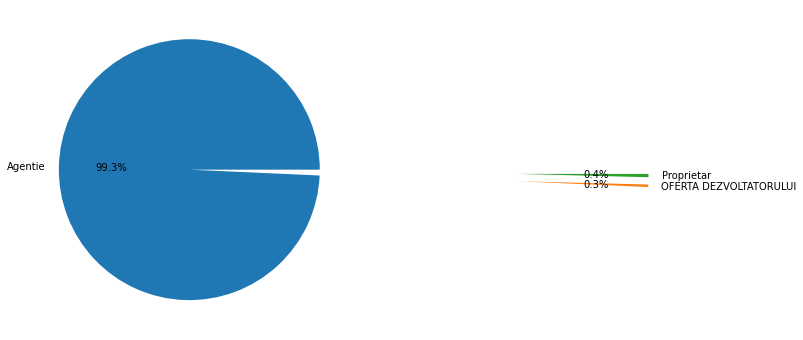

In [37]:
agency = df['agency'].value_counts()['Agentie']
developer = df['agency'].value_counts()['OFERTA DEZVOLTATORULUI']
owner = df['agency'].value_counts()['Proprietar']
explode = [0.02, 2.5,2.5]

values = [agency, developer, owner]
labels = ['Agentie', 'OFERTA DEZVOLTATORULUI', 'Proprietar']

fig = plt.figure(figsize=(12,6))
plt.pie(values, labels = labels, autopct = '%1.1f%%', explode = explode )
plt.tight_layout
plt.show()

This new's are not so great, for me especially, because agency means commision, that means another spending on to the budget<br>
Let's see how many buildings are from each year.

In [38]:
df.groupby(by = 'year').count()

,title,price,details,building_seller,agency,link,built_area,usable_area,type,floor,orientation
year,,,,,,,,,,,
0,90,90,90,90,90,90,90,90,90,90,90
2008,3,3,3,3,3,3,3,3,3,3,3
2009,2,2,2,2,2,2,2,2,2,2,2
2010,8,8,8,8,8,8,8,8,8,8,8
2011,5,5,5,5,5,5,5,5,5,5,5
2012,1,1,1,1,1,1,1,1,1,1,1
2013,5,5,5,5,5,5,5,5,5,5,5
2014,6,6,6,6,6,6,6,6,6,6,6
2015,11,11,11,11,11,11,11,11,11,11,11


Let's see some viz's

<AxesSubplot:xlabel='year', ylabel='count'>

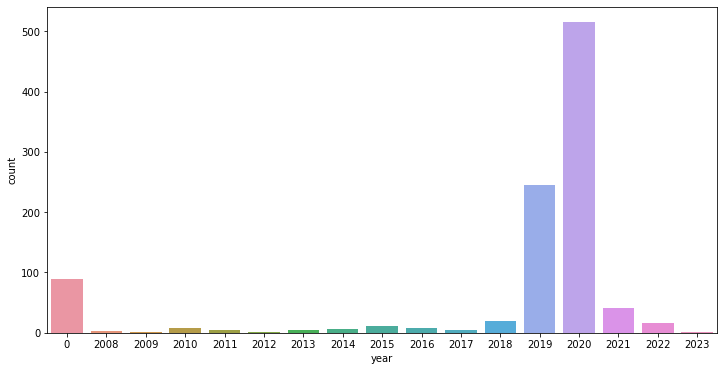

In [39]:
fig = plt.figure(figsize = (12, 6))
sns.countplot(x = 'year', data = df)

So it seems like the the majority of building apartments are construct in 2020 and not selled yet. Somehow this is plausible especially in the context of the pandemic. But I want to investigate this further more by analyzing the type of apartments to see if the majority are new or not.

In [40]:
df['type'].value_counts()

nou                826
utilizat           121
nu e specificat     34
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

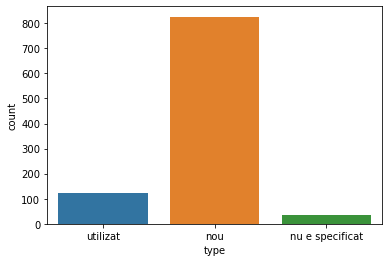

In [41]:
fig = plt.figure()
sns.countplot(x = 'type', data =df)

By the amount of new flats then my previous guessing is true, due to pandemic flats from 2020 they were not sold.<br>
Let's see the repartition of flats on floors

In [42]:
df.groupby(by = 'floor').count()

,title,price,details,building_seller,agency,link,built_area,usable_area,type,year,orientation
floor,,,,,,,,,,,
1,68,68,68,68,68,68,68,68,68,68,68
2,116,116,116,116,116,116,116,116,116,116,116
3,171,171,171,171,171,171,171,171,171,171,171
4,93,93,93,93,93,93,93,93,93,93,93
5,66,66,66,66,66,66,66,66,66,66,66
6,46,46,46,46,46,46,46,46,46,46,46
7,158,158,158,158,158,158,158,158,158,158,158
8,137,137,137,137,137,137,137,137,137,137,137
9,2,2,2,2,2,2,2,2,2,2,2


<AxesSubplot:xlabel='floor', ylabel='count'>

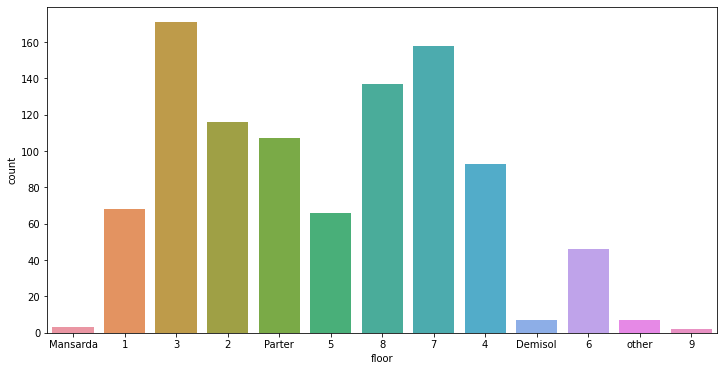

In [43]:
fig = plt.figure(figsize = (12,6))
sns.countplot(x = 'floor', data = df)

It seems like the majority of available flats are on 3 rd floor and parter 2 nd, 4th floors.<br>
Let's see if there are some correlation between price and surface

<AxesSubplot:xlabel='price', ylabel='built_area'>

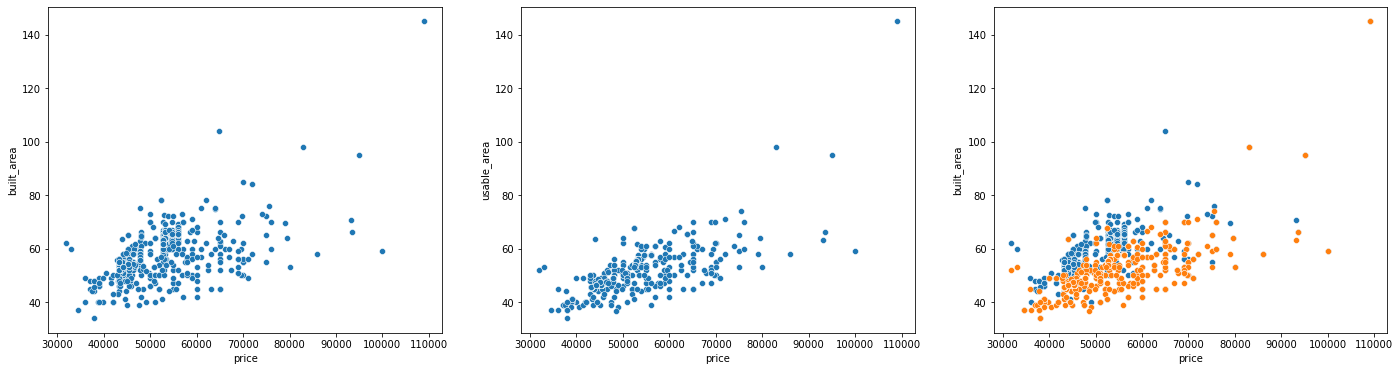

In [45]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (24,6))
sns.scatterplot(x = 'price', y = 'built_area', data = df, ax = ax[0])
sns.scatterplot(x = 'price', y = 'usable_area', data = df, ax = ax[1])
sns.scatterplot(x = 'price', y = 'built_area', data = df, ax = ax[2])
sns.scatterplot(x = 'price', y = 'usable_area', data = df, ax = ax[2])

So Appears that the price is influenced more by the built_area than the usable one.

<AxesSubplot:xlabel='price', ylabel='floor'>

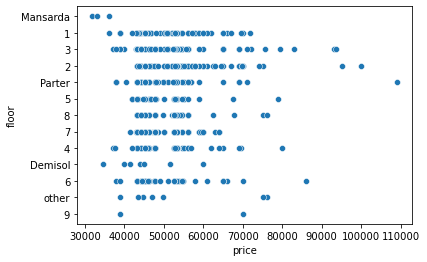

In [46]:
fig = plt.figure()
sns.scatterplot(x = 'price', y = 'floor', data = df)

I can't see any correlation between floor and price

<AxesSubplot:xlabel='price', ylabel='orientation'>

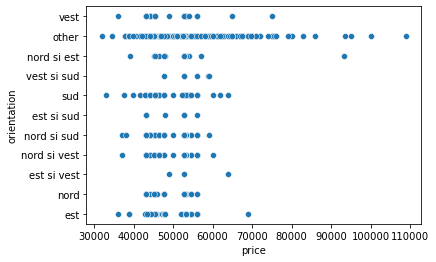

In [47]:
fig = plt.figure()
sns.scatterplot(x = 'price', y = 'orientation', data = df)

I can't see any correlation between floor and price

## Conclusion

### This analysis is an overview of the real estate market in Chiajna Area<br>
So in the Chiajna Area seems like there are many building apartments from 2020 unocupied due to pandemic. Average price on this zone at 23 Feb 2022 is 50670 Euro which is good, is in my budget. Price seems to depend more of the built area then the floor or orientation.<br>
Next step for me?<br>
<b>Going to apartment views!<b>